# Working with t-tests

Below are 5 sets of data. Each of them have questions which can be addressed using a t-test. For each dataset:

1. Identify the research question
2. Choose the appropriate t-test
3. Do the t-test in Python (see chapter and/or slides for code)
4. Report your results using the APA format, just like in the examples in the book (e.g. With a mean grade of 72.3, the psychology students scored slightly higher than the average grade of 67.5 (𝑡(19)=2.25, 𝑝<.05))
5. Make a figure which illustrates the results

NB: for some of these data sets, you may have to re-arrange the data a little before you can do your analysis! If the data are in long format, where there is a column with a grouping variable, like the example below, an easy way to get data out so they can be entered in a t-test is to make two new variables, like this:

| ID number | Group  | Measure |
| :-------: | :----: | :-----: |
|     1     | A      |   32    |
|     2     | B      |  43.2   |
|     3     | A      |  31.2   |
|     4     | B      |  22.1   |

Group1 = pd.DataFrame(df.loc[df['GroupingVariable'] == 'A']['Measure'])

Group2 = pd.DataFrame(df.loc[df['GroupingVariable'] == 'B']['Measure'])

Now the t-test can be done with Group1 and Group2.

## Dataset 1: "Moon and Aggression"

Description:

This data set, "Moon & Aggression", provides the number of disruptive behaviors by dementia patients during two different phases of the lunar cycle (Moore et al, 2012, p. 410). Each row corresponds to one participant.

Variables:

Moon - The average number of disruptive behaviors during full moon days.
Other - The average number of disruptive behaviors during other days.

Assignment:
Examine the adequacy of the null hypothesis which states that the average number of disruptive behaviors among patients with dementia does not differ between moon days and other days. Calculate an appropriate test statistic, and make a figure illustrating the comparison. Write a sentence reporting your results in the same way they are reported in the book (APA format): 

> With a mean grade of 72.3, the psychology students scored slightly higher than the average grade of 67.5 (𝑡(19)=2.25, 𝑝<.05)

References:

Moore, D. S., McCabe, G. P., and Craig. B. A. (2012) Introduction to the Practice of Statistics (7th ed). New York: Freeman.

"These data were collected as part of a larger study of dementia patients conducted by Nancy Edwards and Alan Beck, Purdue University." (Moore et al, 2012, p. N-8). 

In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ethanweed/datasets-for-teaching/main/JASP_data_library/2.%20T-Tests/Moon%20and%20Aggression.csv')
df.head()

,Moon,Other
0,3.33,0.27
1,3.67,0.59
2,2.67,0.32
3,3.33,0.19
4,3.33,1.26


In [5]:
import statistics
from scipy.stats import ttest_rel


mean_fullmoon = statistics.mean(df['Moon'])
mean_other = statistics.mean(df['Other'])
N = df.shape[0]
degrees_of_freedom = N-1


t, p = ttest_rel(a = df['Moon'], b = df['Other'], alternative = 'two-sided')


print("Disruptive behaviours were more frequent during the full moon periods (mean = " +
      str(round(mean_fullmoon,3)) +
      ") than during the other periods (mean = " +
      str(round(mean_other,3)) + 
      "), t(" + str(degrees_of_freedom) + ") = " +
      str(round(t, 3)) + ", p = " + str(round(p, 3)) + ".")

Disruptive behaviours were more frequent during the full moon periods (mean = 3.022) than during the other periods (mean = 0.589), t(14) = 6.452, p = 0.0.


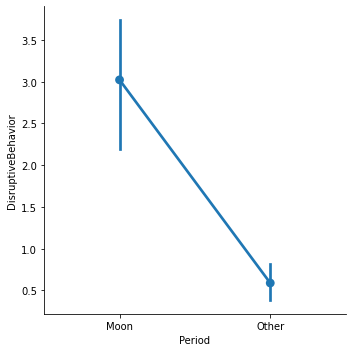

In [6]:
import seaborn as sns

data = pd.melt(df, id_vars=None, var_name='Period', value_name='DisruptiveBehavior')

ax = sns.catplot(x="Period", y = 'DisruptiveBehavior', kind="point", data = data)


## Dataset 2: "Horizontal Eye Movements"

Description:

This data set, "Horizontal Eye Movements", provides the number of recalled words by two groups of participants - during the retention inverval, one group was instructed to fixate on a centrally presented dot; the other group was instructed to execute horizontal saccades. Specifically, 

    "Participants were presented with a list of neutral study words for a subsequent free recall test. Prior to recall, participants were requested to perform - depending on the experimental condition - either horizontal, vertical, or no eye movements (i.e., looking at a central fixation point). The type of eye movement was thus manipulated between subjects. As the effect of eye movement on episodic memory has been reported to be influenced by handedness, we tested only strong right-handed individuals. The dependent variable of interest was the number of correctly recalled words.'' (Matzke et al, 2015, p. 3)

This data set contains only data from participants assigned to the horizontal and no eye movements condition. Calculate an appropriate test statistic, and make a figure illustrating the comparison.

Variables:

ParticipantNumber: Participant's identification number.  

Condition: Experimental condition (Fixed = fixed gaze, Horizontal = horizontal eye movements).  

CriticalRecall: The number of Recalled words after the memory retrieval task. 

Assignment:
Examine whether the data are more likely to occur if horizontal eye movements do not help memory retrieval (null hypothesis), or if they have a positive effect on the memory retrieval (one-sided alternative hypothesis). Calculate an appropriate test statistic, and make a figure illustrating the comparison. Write a sentence reporting your results in the same way they are reported in the book (APA format): 

> With a mean grade of 72.3, the psychology students scored slightly higher than the average grade of 67.5 (𝑡(19)=2.25, 𝑝<.05)

Reference:

Matzke, D., Nieuwenhuis, S., van Rijn, H., Slagter, H. A., van der Molen, M. W., and Wagenmakers, E.-J. (2015). The effect of horizontal eye movements on free recall: A preregistered adversarial collaboration. Journal of Experimental Psychology: General: 144:e1-e15.

In [61]:
df = pd.read_csv('https://raw.githubusercontent.com/ethanweed/datasets-for-teaching/main/JASP_data_library/2.%20T-Tests/Eye%20Movements.csv')
df.head()

,ParticipantNumber,Condition,CriticalRecall
0,1,Horizontal,4
1,3,Fixation,14
2,4,Horizontal,12
3,6,Fixation,4
4,7,Horizontal,11


In [69]:
# Split into two dataframes

Horizontal = pd.DataFrame(df.loc[df['Condition'] == 'Horizontal']['CriticalRecall'])
Fixation = pd.DataFrame(df.loc[df['Condition'] == 'Fixation']['CriticalRecall'])


# calculate independent-samples t-test

from scipy import stats
t, p = stats.ttest_ind(Horizontal['CriticalRecall'], Fixation['CriticalRecall'], 
                       equal_var = False, 
                       alternative = 'greater')

# get statistics for reporting

print('Mean Horizontal:', statistics.mean(Horizontal['CriticalRecall']))
print('Mean Fixation:', statistics.mean(Fixation['CriticalRecall']))
print('N:', len(Horizontal) + len(Fixation))
print('degrees of freedom:', (len(Horizontal) + len(Fixation))-2)
print("t =", t)
print("p =", p)

Mean Horizontal: 10.88
Mean Fixation: 15.291666666666666
N: 49
degrees of freedom: 47
t = -2.8234133654901394
p = 0.9963242482081401


    "Critical recall in the Horizontal (mean = 10.8) condition  was not found to be significantly higher than in the Fixation (mean = 15.3) condition (t(47) = -2.82, p = 0.99)."

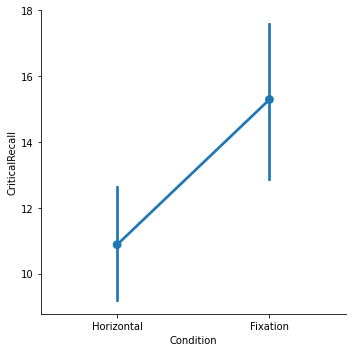

In [71]:

ax = sns.catplot(x="Condition", y = 'CriticalRecall', kind="point", data = df)


## Dataset 3: "Laser Blue Jeans"

Description: 

Experiment comparing tensile strength and extension of blue
jeans that were designed using two methods: manually and with laser beams. Designers of blue jeans often want to treat areas of the jeans to give them a faded look by blasting them with quartz sand under high pressure. The areas to be treated with sand need to be marked out; this is traditionally done by hand with a pen, but this is very time-consuming. A quicker way would be to use lasers to mark the areas, but how does this affect the strength and stretchability of the material? To test this, the authors treated 20 pairs of jeans with each design method, then took 3 samples from different parts of each pair of jeans, giving a total sample size of N = 2(20)(3) = 120. The samples were tested for tensile strength and extension by pulling the fabric samples between two hooks until they ripped.

![](LaserJeans.png)

Figure 1: Some examples of denim trousers designed by laser beam method (from Ondogan et al, 2005)

Assignment:

Determine whether the tensile strength and extension of the blue jeans was significantly different using the time-saving laser technique. Calculate an appropriate test statistic, and make a figure illustrating the comparison. Write a sentence reporting your results in the same way they are reported in the book (APA format): 

> With a mean grade of 72.3, the psychology students scored slightly higher than the average grade of 67.5 (𝑡(19)=2.25, 𝑝<.05)


Variables:

method: 1 = manual, 2 = laser
jeanid
sampleid
strength (Newtons)
extension (Newtons)

Reference: 

Z. Ondogan, O. Pamuk, E.N. Ondogan, A. Ozguney (2005).
"Improving the Appearance of All Textile Products from Clothing to Home
Textile Using Laser Technology," Optics and Laser Technology, Vol. 37,
pp. 631-637.




In [78]:
df = pd.read_csv('https://raw.githubusercontent.com/ethanweed/datasets-for-teaching/main/university_of_florida/bluejeans_laser.csv')
df.head()

,method,jeanid,sampleid,strength,extension
0,1,1,1,1266,68.06
1,1,2,1,1099,61.54
2,1,3,1,1068,40.48
3,1,4,1,1266,59.83
4,1,5,1,968,55.89


In [99]:
Manual_s = pd.DataFrame(df.loc[df['method'] == 1]['strength'])
Laser_s = pd.DataFrame(df.loc[df['method'] == 2]['strength'])
Manual_e = pd.DataFrame(df.loc[df['method'] == 1]['extension'])
Laser_e = pd.DataFrame(df.loc[df['method'] == 2]['extension'])

t, p = stats.ttest_ind(Manual_s, Laser_s, equal_var = False)

# get statistics for reporting

print('Mean Manual Strength:', round(statistics.mean(Manual_s['strength']),3))
print('Mean Laser Strength:', round(statistics.mean(Laser_s['strength']),3))
print('Mean Manual Extension:', round(statistics.mean(Manual_e['extension']),3))
print('Mean Laser Extension:', round(statistics.mean(Laser_e['extension']),3))     

print('N:', len(Manual_s) + len(Laser_s))
print('degrees of freedom:', (len(Manual_s) + len(Laser_s))-2)
print("t =", t)
print("p =", p)

Mean Manual Strength: 1067.433
Mean Laser Strength: 1273.283
Mean Manual Extension: 65.059
Mean Laser Extension: 71.343
N: 120
degrees of freedom: 118
t = [-12.80256904]
p = [4.71590061e-24]


    "Tensile strength in the Laser (mean = 1273.283) condition was significantly higher than in the Manual (mean = 1067.433) condition (t(118) = -12.8, p = 0.00)"

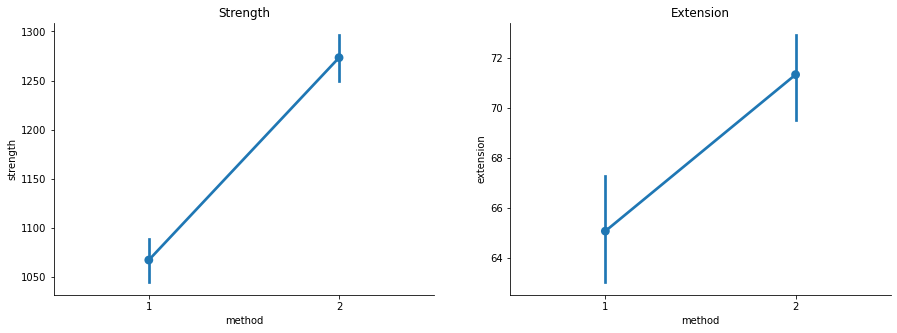

In [106]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.pointplot(x="method", y = 'strength', kind="point", data = df, ax = axes[0])
sns.pointplot(x="method", y = 'extension', kind="point", data = df, ax = axes[1])

axes[0].set_title('Strength')
axes[1].set_title('Extension')

sns.despine()


## Dataset 4: "Southern Crime"

Description:

This dataset contains a variety of data on crime rates in different states in the United States. 

| CrimeRate          | Crime rate (number of offences per million population)             | Continuous |
|--------------------|--------------------------------------------------------------------|------------|
| Youth              | Young males (number of males aged 18-24 per 1000)                  | Discrete   |
| Southern           | Southern state 1 = yes, 0 = no                                     | Binary     |
| Education          | Education time (average number of years schooling up to 25)        | Discrete   |
| ExpenditureYear0   | Expenditure (per capita expenditure on police)  skewed             | Continuous |
| LabourForce        | Youth labour force (males employed 18-24 per 1000)                 | Discrete   |
| Males              | Males (per 1000 females)                                           | Discrete   |
| MoreMales          | More males identified per 1000 females 1 = yes, 0 = no             | Binary     |
| StateSize          | State size (in hundred thousands)                                  | Discrete   |
| YouthUnemployment  | Youth Unemployment (number of males aged 18-24 per 1000) skewed    | Discrete   |
| MatureUnemployment | Mature Unemployment (number of males aged 35-39 per 1000)          | Discrete   |
| HighYouthUnemploy  | High Youth Unemployment 1 = yes, 0 = no (high if Youth >3*Mature ) | Binary     |
| Wage               | Wage (median weekly wage)                                          | Continuous |
| BelowWage          | Below Wage (number of families below half wage per 1000)           | Discrete   |


Assignment:
Examine whether there is a significant difference in crime rates between southern and northern states. Calculate an appropriate test statistic, and make a figure illustrating the comparison. Write a sentence reporting your results in the same way they are reported in the book (APA format): 

> With a mean grade of 72.3, the psychology students scored slightly higher than the average grade of 67.5 (𝑡(19)=2.25, 𝑝<.05)

Source:
I'm still tracking down details on this one. But let's assume it is correct.

In [131]:
df = pd.read_csv('https://raw.githubusercontent.com/ethanweed/datasets-for-teaching/main/sheffield_MASH/crime.csv')
df.head()

,CrimeRate,Youth,Southern,Education,ExpenditureYear0,LabourForce,Males,MoreMales,StateSize,YouthUnemployment,...,ExpenditureYear10,LabourForce10,Males10,MoreMales10,StateSize10,YouthUnemploy10,MatureUnemploy10,HighYouthUnemploy10,Wage10,BelowWage10
0,45.5,135,0,12.4,69,540,965,0,6,80,...,71,564,974,0,6,82,20,1,632,142
1,52.3,140,0,10.9,55,535,1045,1,6,135,...,54,540,1039,1,7,138,39,1,521,210
2,56.6,157,1,11.2,47,512,962,0,22,97,...,44,529,959,0,24,98,33,0,359,256
3,60.3,139,1,11.9,46,480,968,0,19,135,...,41,497,983,0,20,131,50,0,510,235
4,64.2,126,0,12.2,106,599,989,0,40,78,...,97,602,989,0,42,79,24,1,660,162


In [126]:
Southern = pd.DataFrame(df.loc[df['Southern'] == 1]['CrimeRate'])
Northern = pd.DataFrame(df.loc[df['Southern'] == 0]['CrimeRate'])

t, p = stats.ttest_ind(Southern['CrimeRate'], NotSouthern['CrimeRate'], equal_var = False)

# get statistics for reporting

print('Mean Crimerate Southern:', statistics.mean(Southern['CrimeRate']))
print('Mean Crimerate Northern:', statistics.mean(Northern['CrimeRate']))
print('N:', len(Southern['CrimeRate']) + len(Northern['CrimeRate']))
print('degrees of freedom:', len(Southern['CrimeRate']) + len(Northern['CrimeRate'])-2)
print("t =", t)
print("p =", p)

print("t =", round(t,3))
print("p =", round(p,3))


Mean Crimerate Southern: 100.68125
Mean Crimerate Northern: 103.90645161290323
N: 47
degrees of freedom: 45
t = -0.4005489620244038
p = 0.6908611786450152
t = -0.401
p = 0.691


    "There was no significant difference (t(45) = -0.4, P = 0.69) between crime rates in Southern (mean = 100.7) and Northern (mean = 103.9) states."

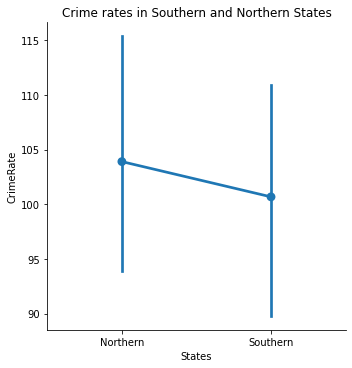

In [139]:
df = pd.read_csv('https://raw.githubusercontent.com/ethanweed/datasets-for-teaching/main/sheffield_MASH/crime.csv')

# Replace 0 and 1 with "Northern" and "Southern" so that the categories are clearer in the graph
df.loc[df['Southern'] == 0, 'States'] = 'Northern' 
df.loc[df['Southern'] == 1, 'States'] = 'Southern' 


ax = sns.catplot(x="States", y = 'CrimeRate', kind="point", data = df)
ax.set(title = 'Crime rates in Southern and Northern States')

## Dataset 5: "Weight Gain"

Description:

This data set, "Weight Gain", provides weights of 16 participants before and after an eight-week period of excessive calorie intake (Moore et al., 2012, p. 425).

Variables:

Weight Before - Weight in pounds (lb) measured before eight weeks of excessive calorie intake.
Weight After - Weight in pounds (lb) measured after eight weeks of excessive calorie intake.
Difference - Weight After - Weight Before.

Assignment:

Test the hypothesis that 1000 excess calorie intake per day over 8 weeks results in 16 pounds (approximately 7.2 kilograms) weight increase. Calculate an appropriate test statistic, and make a figure illustrating the comparison. Write a sentence reporting your results in the same way they are reported in the book (APA format): 

> With a mean grade of 72.3, the psychology students scored slightly higher than the average grade of 67.5 (𝑡(19)=2.25, 𝑝<.05) 

References:

Moore, D. S., McCabe, G. P., and Craig, B. A. (2012). Introduction to the Practice of Statistics (7th ed.). New York: Freeman.

Levine, J. A., Eberhardt, N. L., and Jensen, M. D. (1999) Role of nonexcercise activity thermogenesis in resistance to fat gain in humans. Science, 283:212-214.

In [141]:
df = pd.read_csv("https://raw.githubusercontent.com/ethanweed/datasets-for-teaching/main/JASP_data_library/2.%20T-Tests/Weight%20Gain.csv")

In [142]:
df.head()

,Weight Before,Weight After,Difference
0,122.54,135.74,13.20
1,120.78,129.36,8.58
2,131.12,145.20,14.08
3,137.06,145.64,8.58
4,163.24,173.80,10.56


In [147]:
#from scipy.stats import ttest_rel
from scipy.stats import ttest_1samp
import statistics

t, p = ttest_1samp(a = df['Difference'], popmean = 16)

# get statistics for reporting

print("Mean difference =", statistics.mean(df['Difference']))
print('N:', len(df['Difference']))
print('degrees of freedom:', len(df['Difference'])-1)
print("t =", t)
print("p =", p)



Mean difference = 10.40875
N: 16
degrees of freedom: 15
t = -5.82325030287623
p = 3.354794689965688e-05


    "Weight gain after the eight-week period of excessive calorie intake was significantly less (mean gain = 10.4 lbs) than the mean population gain of 16 lbs (t(15) = -5.82, p = 0.00)."

[Text(0.5, 1.0, 'Sample weight gain compared to population mean (16 lbs)')]

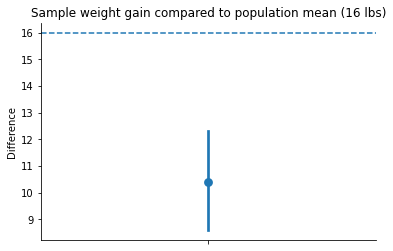

In [155]:
ax = sns.pointplot(y = 'Difference', data = df)
ax.axhline(y = 16, linestyle = '--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set(title = 'Sample weight gain compared to population mean (16 lbs)')